In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [3]:
df=pd.read_excel('./시도별 전출입 인구수.xlsx',engine='openpyxl', header=0)

In [4]:
df=df.fillna(method='ffill')

In [5]:
mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')

In [6]:
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [7]:
col_years=list(map(str, range(2010,2017+1)))
df_4=df_seoul.loc[['충청남도', '경상북도','강원도','전라남도'],col_years]
df_4=df_4.T
df_4

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


In [8]:
plt.style.use('bmh')

In [9]:
df_4.index = df_4.index.map(int)

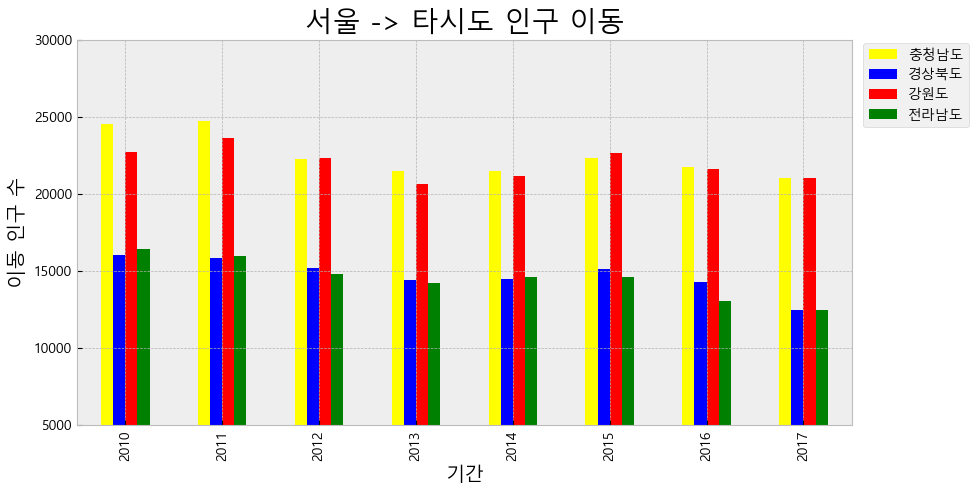

In [10]:
df_4.plot(kind='bar',figsize=(10,5), width=0.5, color=['yellow', 'blue', 'red', 'green'])

plt.title('서울 -> 타시도 인구 이동', size=20)
plt.ylabel('이동 인구 수', size=14)
plt.xlabel('기간', size=14)
plt.ylim(5000,30000)
plt.legend(bbox_to_anchor = (1.16,1.01), fontsize=10)

plt.show()

In [11]:
df_4=df_4.T

In [12]:
df_4['합계']=df_4.sum(axis=1)

전입지,충청남도,경상북도,강원도,전라남도,합계
2010,24522,16042,22736,16429,NaN
2011,24723,15818,23624,15974,NaN
2012,22269,15191,22332,14765,NaN
2013,21486,14420,20601,14187,NaN
2014,21473,14456,21173,14591,NaN
2015,22299,15113,22659,14598,NaN
2016,21741,14236,21590,13065,NaN
2017,21020,12464,21016,12426,NaN


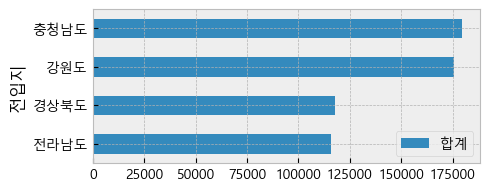

In [17]:
df_total = df_4[['합계']].sort_values(by='합계',ascending=True)

df_total.plot(kind='barh', figsize=(5,2))

plt.show()